In [1]:
from deap import base
from deap import creator
from deap import tools

import random
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import elitism

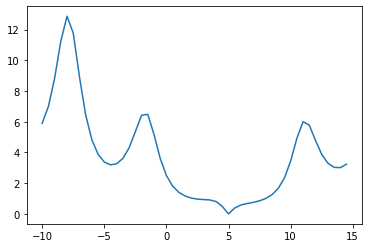

In [2]:
x_0 = np.arange(-10, 15, 0.5)
ff = np.zeros(shape = (len(x_0), 1))

for i in range(len(x_0)):
  ff[i] = np.abs((x_0[i] - 5) / (2 + math.sin(x_0[i])))

plt.plot(x_0, ff)

In [3]:
POPULATION_SIZE = 100
P_CROSSOVER = 0.8
P_MUTATION = 0.2 
MAX_GENERATIONS = 20
HALL_OF_FAME_SIZE = 10

In [4]:
def function_mini(individual):
    x = -13.5
    for bin in range(10):
      x += individual[bin] * 2**(5 - bin)
    
    if x > 15:
      x = 15
    elif x < -10:
      x = -10

    f = np.abs((x - 5) / (2 + math.sin(x)))
    return -f, 

In [5]:
toolbox = base.Toolbox()
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox.register("zeroOrOne", random.randint, 0, 1)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, 10)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)
toolbox.register("evaluate", function_mini)
toolbox.register("select", tools.selRoulette)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/10)

In [6]:
population = toolbox.populationCreator(n=POPULATION_SIZE)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)
population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=False)
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

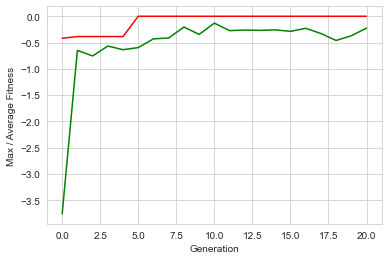

In [8]:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')

plt.show()

In [9]:
best = hof.items[0]

x = -13.5
for bin in range(10):
  x += best[bin] * 2**(5 - bin)
if x > 15:
  x = 15
elif x < -10:
  x = -10
f = np.abs((x - 5) / (2 + math.sin(x)))

print("El fitness vale ",f,"para X =",x)

El fitness vale  0.0 para X = 5.0
